In [1]:
#Loan Approval Prediction
##Importing libraries and functions: First we need to import all the funcionts and libraries that we are going to use

from pandas.io.parsers.readers import read_csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
##Now we need to read our Dataset

data_base = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")
print(data_base.head(10))

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   
5        6                  0       Graduate            Yes        4800000   
6        7                  5       Graduate             No        8700000   
7        8                  2       Graduate            Yes        5700000   
8        9                  0       Graduate            Yes         800000   
9       10                  5   Not Graduate             No        1100000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000 

In [3]:
#Now we need to check the datatypes that we have in our dataset
print(data_base.dtypes)
#After seeing the datatypes we will need to change the Education, self_employed and loan_status but we are going to do it before analyze all the data

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object


In [4]:
#Now we need to check the summarie of the data
print(data_base.describe(include = "all")) #We see that we have 4269 rows of data and all of the data make sense

            loan_id   no_of_dependents  education  self_employed  \
count   4269.000000        4269.000000       4269           4269   
unique          NaN                NaN          2              2   
top             NaN                NaN   Graduate            Yes   
freq            NaN                NaN       2144           2150   
mean    2135.000000           2.498712        NaN            NaN   
std     1232.498479           1.695910        NaN            NaN   
min        1.000000           0.000000        NaN            NaN   
25%     1068.000000           1.000000        NaN            NaN   
50%     2135.000000           3.000000        NaN            NaN   
75%     3202.000000           4.000000        NaN            NaN   
max     4269.000000           5.000000        NaN            NaN   

         income_annum   loan_amount    loan_term   cibil_score  \
count    4.269000e+03  4.269000e+03  4269.000000   4269.000000   
unique            NaN           NaN          NaN   

In [5]:
#Let's check if we have any missing value
print(data_base.isnull().sum()) #We don't have any missing value

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [6]:
#Do we have Loan_id info duplicated? 
print(data_base["loan_id"].duplicated().sum()) #We have checked that we don't have any value duplicated

0


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


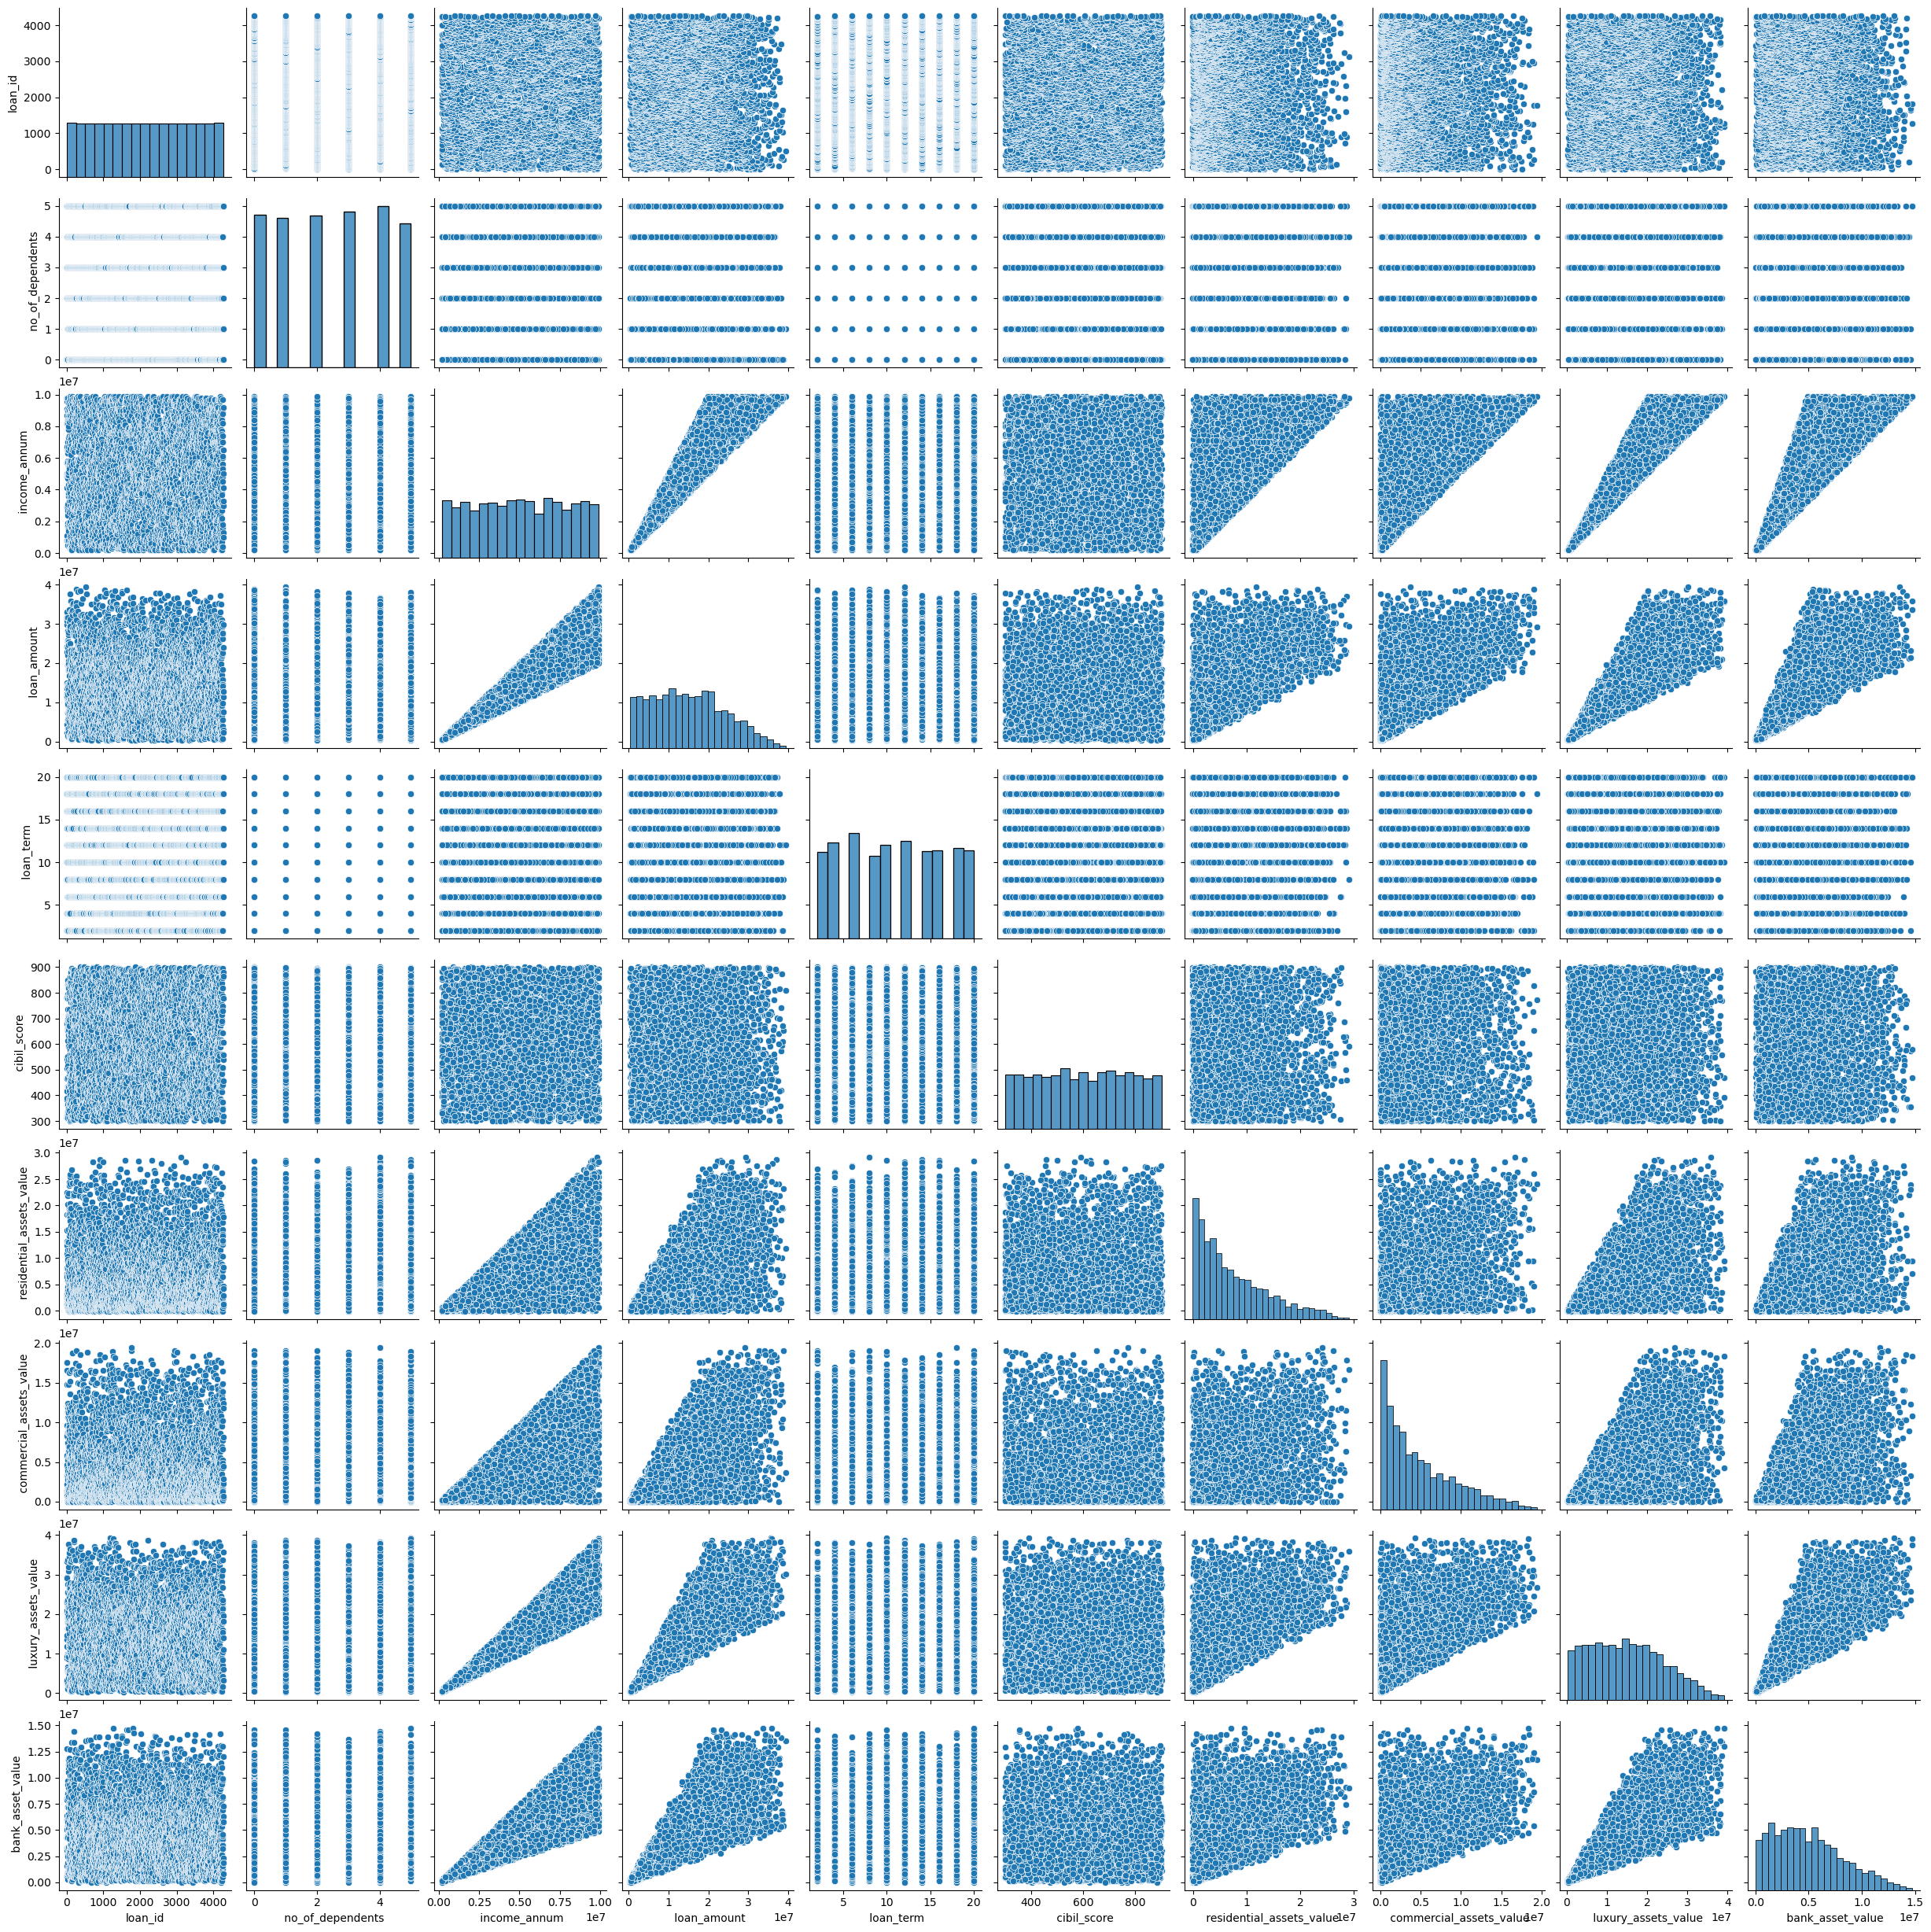

In [7]:
#So we have all the data ready to start the Analyzsis, we will start with a pairplot to have an overview of the features
sns.pairplot(data_base)

We see that we have a positive correlation between some features, an example is loan_amount with income_annum, luxury_assets_value and bank_asset_value

In [8]:
loan_mean = data_base[" loan_amount"].mean()
print(loan_mean)

15133450.456781447


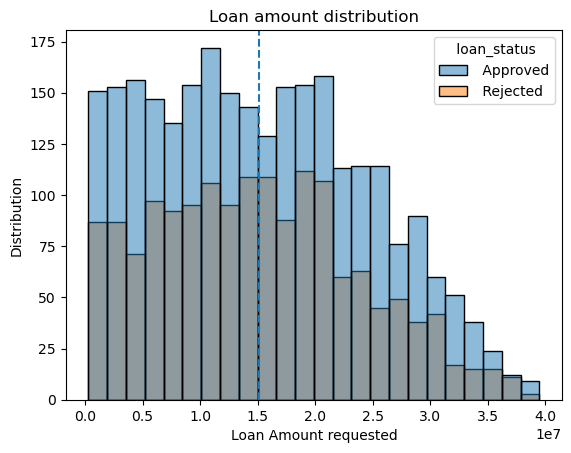

In [9]:
#It will be intersting to see how is the distribution of the loan_amount per loan_status
fig, ax = plt.subplots()
sns.histplot(data_base, x=" loan_amount", hue=" loan_status", ax=ax)
ax.set(xlabel= "Loan Amount requested", ylabel="Distribution", title= "Loan amount distribution")
ax.axvline(x=loan_mean, label='Loan amount mean', linestyle= '--')
plt.show()

We realized that the loan amount between the ones who has been approved and the ones who has not been approved have a similiar distribution but let's check the other features that we have identify

In [10]:
#First we need to obtain the corr values to make the visual of the data
db_corr = data_base.corr ()
db_corr.style.background_gradient (cmap = 'coolwarm')

/tmp/ipykernel_32/2010873417.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  db_corr = data_base.corr ()


So we identify that income_annum, loan_amount, luxury_assets_value, bank_asset_value are the ones who have a bigger correlation, so lets make a new view of them, it's weird that the credit score has a lower correlation

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


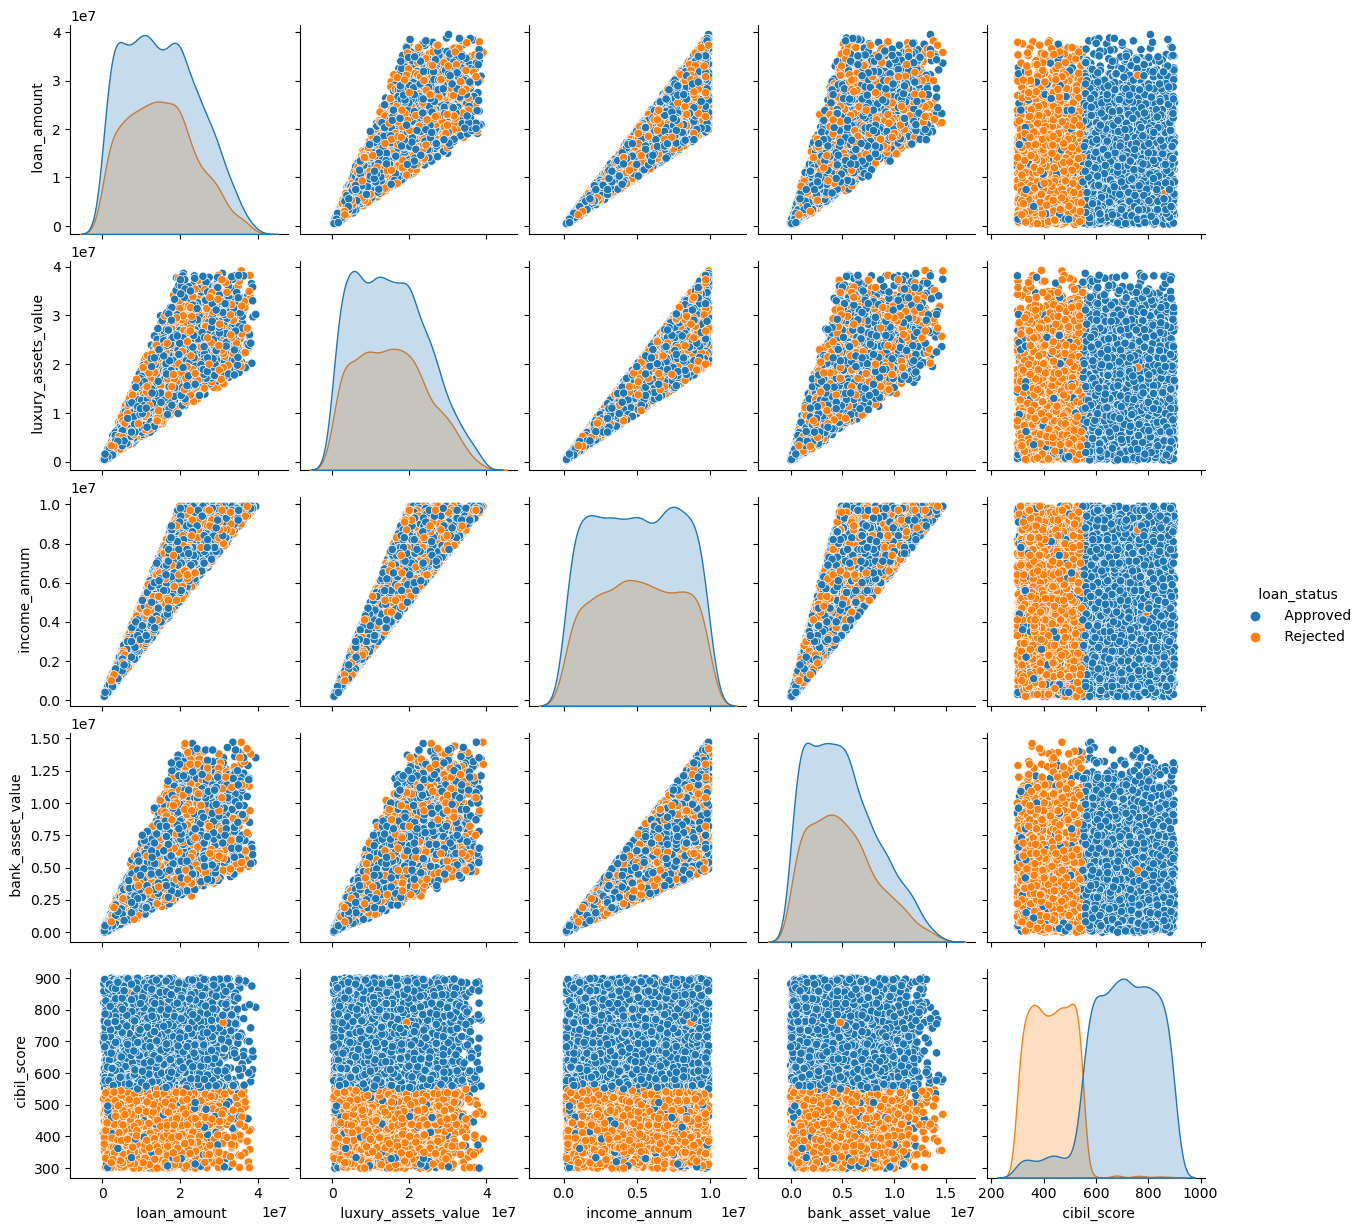

In [11]:
sns.pairplot(data_base, vars=[" loan_amount", " luxury_assets_value"," income_annum", " bank_asset_value", " cibil_score"],
            hue=" loan_status")
plt.show()

Now we see that the Cibil score has a big importance to know if a loan amount will be accepted or rejected, we could see that the people who have a lower cibil score of 600 have more probability to be rejected and the other varibles have a positive relationship between them

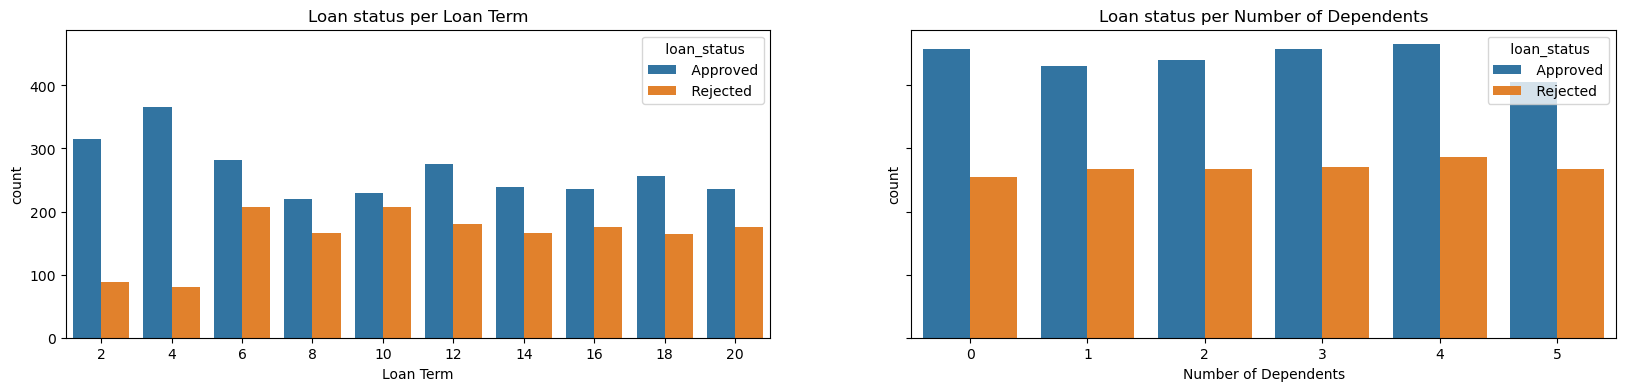

In [12]:
#Let's check if the loan term, self employed and eduaction have a relationship with the loan status
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20,4))
sns.countplot(data=data_base, x=" loan_term",hue=" loan_status", ax=ax1)
sns.countplot(data=data_base, x=" no_of_dependents",hue=" loan_status", ax=ax2)
ax1.set(xlabel="Loan Term", title= "Loan status per Loan Term")
ax2.set(xlabel="Number of Dependents", title= "Loan status per Number of Dependents")
plt.show()

We see that the loans request who have a short term have more probability to be approved and the number of dependents you could se that the 60% has been approved.

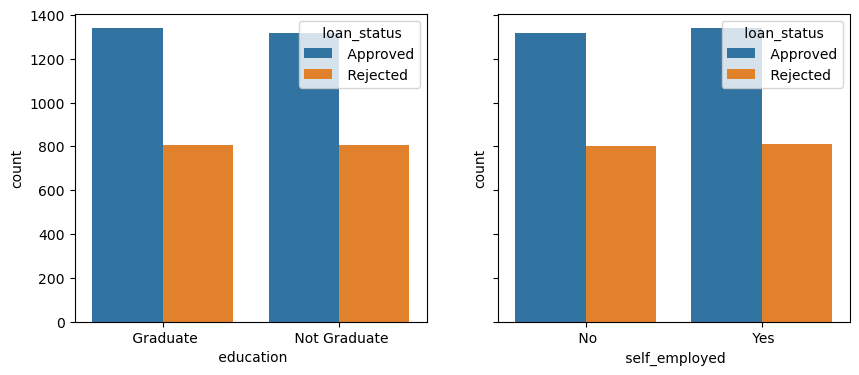

In [13]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,4))
sns.countplot(data=data_base,  x=" education", ax=ax3, hue=" loan_status")
sns.countplot(data=data_base,  x=" self_employed", ax=ax4, hue=" loan_status")
ax1.set(xlabel="Education", title= "Loan status per Education")
ax2.set(xlabel="Self Employed", title= "Loan status per Self Employed")
plt.show()

In [14]:
data_base.columns = data_base.columns.str.replace(' ', '') #We need to replace the spaces that we have in the column names

In [15]:
data_base["education"] = data_base["education"].str.strip() #we need to replace the spaces in the data that we have
data_base["self_employed"] = data_base["self_employed"].str.strip()
data_base["loan_status"] = data_base["loan_status"].str.strip()

In [16]:
#Now we need to make the last modification od the dataset
data_base["education"] = data_base["education"].map({'Graduate': 0, 'Not Graduate': 1}).astype(int)
data_base["self_employed"] = data_base["self_employed"].map( {'Yes': 0, 'No': 1}).astype(int)
data_base["loan_status"] = data_base["loan_status"].map( {'Approved': 0, 'Rejected': 1}).astype(int)

**MODELS**

In [37]:
#Import functions to compute accuracy
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

#Import models, model selection
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier, VotingClassifier


# Set seed for reproducibility
SEED = 42

In [18]:
#Now we need to split the data
X = data_base.drop("loan_status", axis=1).values
y = data_base["loan_status"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.2, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
#Decission Tree
dt= DecisionTreeClassifier(max_depth=2, random_state=SEED)
#Fit dt to the training set
dt.fit(X_train_scaled,y_train)
#Predict the test labels
y_pred = dt.predict(X_test_scaled)
y_pred_prob = dt.predict_proba(X_test_scaled)[:,1]
#Evaluate the test-set accuaracy
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

0.9613583138173302
0.9941024878580632


In [20]:
#Decission Tree, set 'criterion' to 'gini'
dtg= DecisionTreeClassifier(criterion='gini', random_state=SEED)
#Fit dt to the training set
dtg.fit(X_train_scaled,y_train)
#Predict the test labels
y_pred_dtg = dtg.predict(X_test_scaled)
y_pred_dtgprob = dtg.predict_proba(X_test_scaled)[:,1]
#Evaluate the test-set accuaracy
print(accuracy_score(y_test, y_pred_dtg))
print(roc_auc_score(y_test, y_pred_dtgprob))

0.9742388758782201
0.9707952166891138


In [21]:
#AdaBoost
#We need to instantiate a classification tree 'dtab'
dtab= DecisionTreeClassifier(max_depth=1, random_state=SEED)
#instantiate an AdaBoost classifier 'adab_clf'
adb_clf= AdaBoostClassifier(base_estimator=dtab, n_estimators=100)
#Fit adb_clf to the training set
adb_clf.fit(X_train_scaled,y_train)
#Predict the test set 
y_pred_adb= adb_clf.predict(X_test_scaled)
y_pred_adbprob = adb_clf.predict_proba(X_test_scaled)[:,1]
#Evaluate the test-set accuaracy
print(accuracy_score(y_test,y_pred_adb))
print(roc_auc_score(y_test,y_pred_adbprob))

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9789227166276346
0.9932075119670228


In [22]:
#Gradient Boosting
#Instantiate a GradientBoostingClassifier 'gbt'
gbt = GradientBoostingClassifier(n_estimators=300, max_depth=1,random_state=SEED)
#Fit 'gbt' to the train set
gbt.fit(X_train_scaled, y_train)
#Predict the test set
y_pred_gbt = gbt.predict(X_test_scaled)
y_pred_gbtprob = gbt.predict_proba(X_test_scaled)[:,1]
#Evaluate the test-set accuracy
print(accuracy_score(y_test,y_pred_gbt))
print(roc_auc_score(y_test,y_pred_gbtprob))

0.9789227166276346
0.9951140729857212


In [23]:
#Baggaging
#Instantiate a classification tree 'dtb'
dtb = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)
#Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dtb, n_estimators=300, n_jobs=-1)
#Fit 'bc' to the training set
bc.fit(X_train_scaled, y_train)
# Predict test set
y_pred_bc = bc.predict(X_test_scaled)
y_pred_bcprob = bc.predict_proba(X_test_scaled)[:,1]
#Evaluate the test-set accuracy
print(accuracy_score(y_test, y_pred_bc))
print(roc_auc_score(y_test,y_pred_bcprob))

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:14

0.9637002341920374
0.9719204958224742


In [24]:
#Random Forest Classifier
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)
# Fit 'rf' to the training set
rf.fit(X_train_scaled, y_train)
# Predict the test set labels 'y_pred'
y_pred_rf = rf.predict(X_test_scaled)
y_pred_rfprob = rf.predict_proba(X_test_scaled)[:,1]
#Evaluate the test-set accuracy
print(accuracy_score(y_test, y_pred_rf))
print(roc_auc_score(y_test,y_pred_rfprob))

0.9637002341920374
0.9933824258219492


In [25]:
#KNNeighboirs
# Instaniate a Knn 'knn'
knn = KNeighborsClassifier(n_neighbors=6)
#Fit 'knn' to the training set
knn.fit(X_train_scaled, y_train)
# Predictions
y_pred_knn = knn.predict(X_test_scaled)
y_pref_knnprob = knn.predict_proba(X_test_scaled)[:,1]
#Evaluate the test-set accuracy
print(accuracy_score(y_test, y_pred_knn))
print(roc_auc_score(y_test,y_pref_knnprob))

0.8758782201405152
0.9532163742690059


In [26]:
#LogisticRegression
#Instaniate a Logreg 'logreg'
logreg = LogisticRegression()
#Fit the model
logreg.fit(X_train_scaled, y_train)
#Predictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_logregprob = logreg.predict_proba(X_test_scaled)[:,1]
#Accuracy
print(accuracy_score(y_test, y_pred_logreg))
print(roc_auc_score(y_test,y_pred_logregprob))

0.9215456674473068
0.9743226460967974


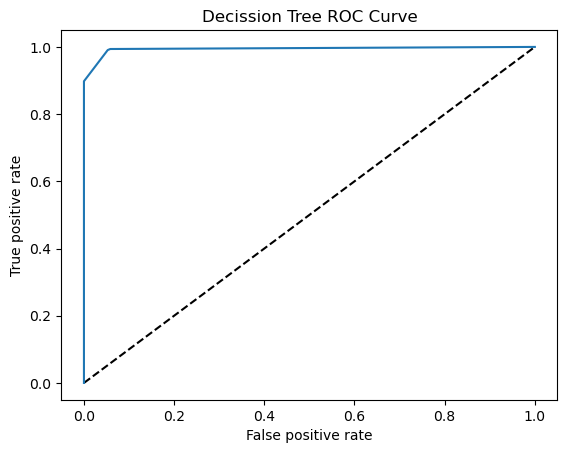

In [27]:
#Decission Tree ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decission Tree ROC Curve')
plt.show()

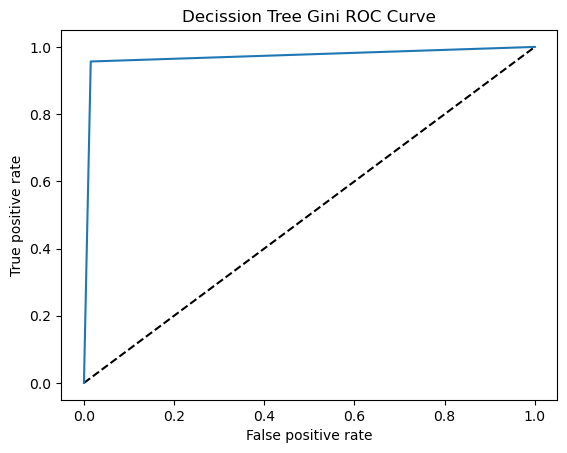

In [28]:
#Decission Tree 'Gini' ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtgprob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decission Tree Gini ROC Curve')
plt.show()

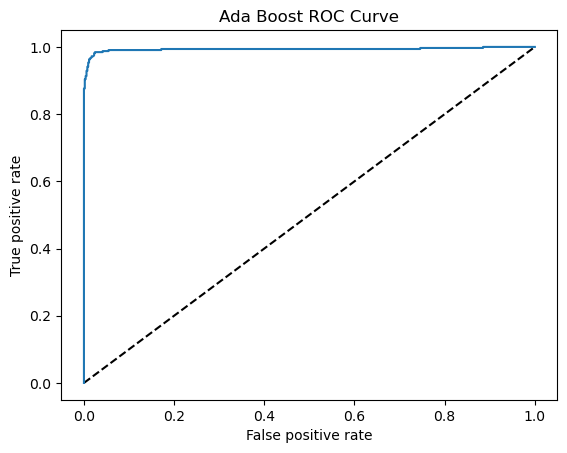

In [30]:
#Ada Boost
fpr, tpr, thresholds = roc_curve(y_test, y_pred_adbprob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Ada Boost ROC Curve')
plt.show()

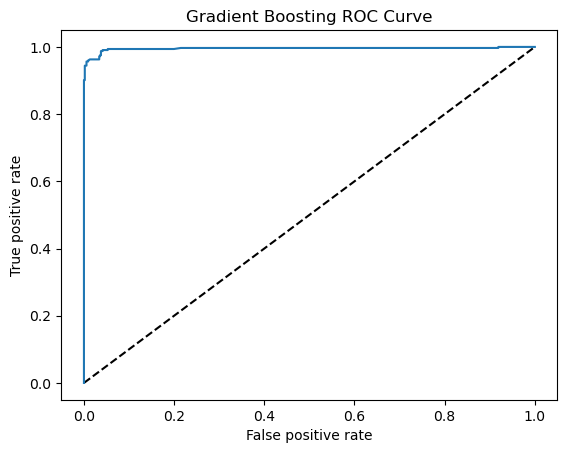

In [32]:
#Gradient Boosting
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gbtprob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting ROC Curve')
plt.show()

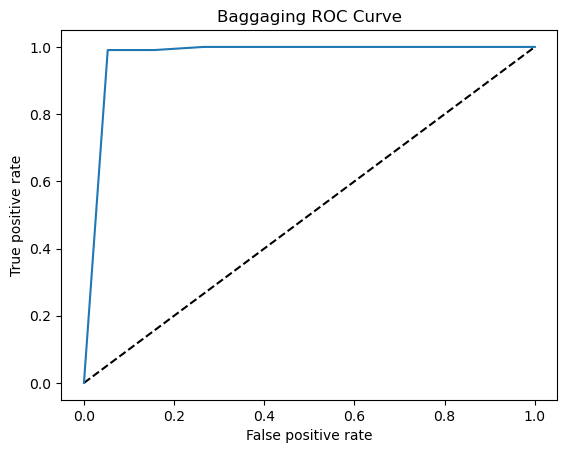

In [33]:
#Baggaging 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bcprob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Baggaging ROC Curve')
plt.show()

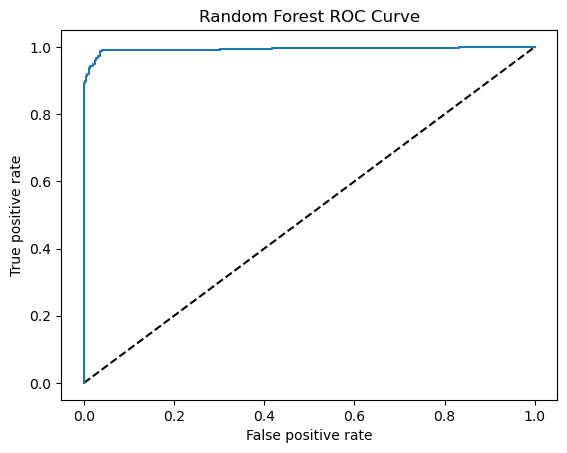

In [34]:
#Random Forest 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfprob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC Curve')
plt.show()

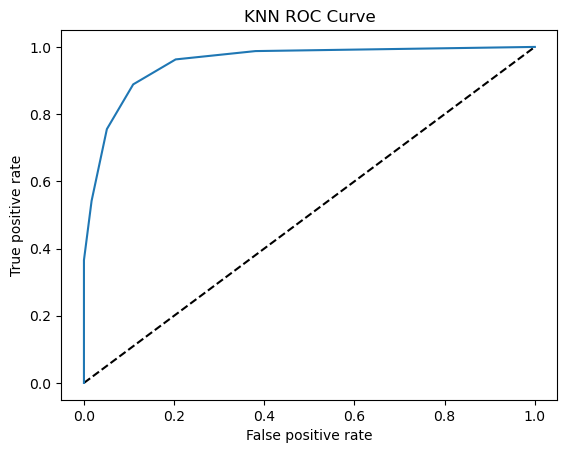

In [35]:
#KNN
fpr, tpr, thresholds = roc_curve(y_test, y_pref_knnprob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNN ROC Curve')
plt.show()

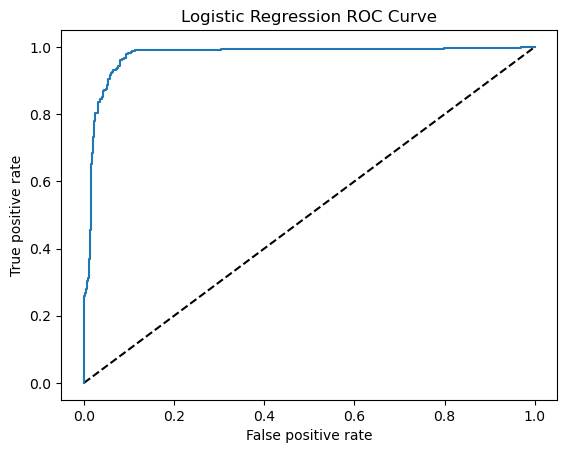

In [36]:
#Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logregprob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [38]:
#Lets see the result that we could obtain with the voting classifier
classifiers = [('Logistic Regression', logreg),
              ('K Nearest Neighbours',knn),
              ('Decision Tree', dt)]

In [39]:
#  Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    clf.fit(X_train_scaled, y_train)
    y_predictions = clf.predict(X_test_scaled)
    print('{:s} :{:.3f}'.format(clf_name, accuracy_score(y_test,y_predictions)))

Logistic Regression :0.922
K Nearest Neighbours :0.876
Decision Tree :0.961


In [42]:
# Instantiate a VotingClassifier 'vc'
vc= VotingClassifier(estimators=classifiers)
#Fit the model
vc.fit(X_train_scaled, y_train)
#Make the predictions
vc.predict(X_test_scaled)
#Evaliate the test-set accuracy of 'vc
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test,y_predictions)))

Voting Classifier: 0.961


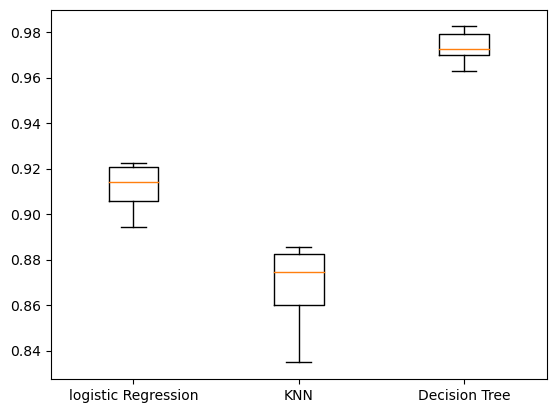

In [46]:
#Evaluating classification models with Kfolds
models = {"logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree": DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=SEED, shuffle=True)
    cv_results= cross_val_score(model,X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [47]:
#Test performance
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

logistic Regression Test Set Accuracy: 0.9215456674473068
KNN Test Set Accuracy: 0.8805620608899297
Decision Tree Test Set Accuracy: 0.9730679156908665
